In [1]:
from matplotlib import pyplot as plt
%load_ext autoreload
%autoreload 2

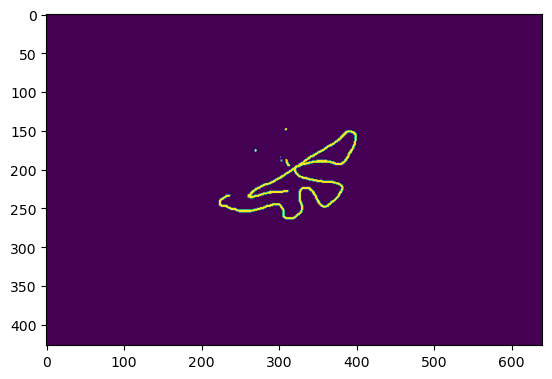

In [2]:
from utils.data_utils import ImageDataset, create_dataloaders

data = ImageDataset(r"data/bf.png", r"data/bf_fore.png", r"data/bf_back.png")
train_loader, test_loader = create_dataloaders(data)

plt.imshow(data.mask_fore)
plt.show()

In [3]:
from utils.training_utils import TrainingCenter
from torch.optim import AdamW
from models import Network

net = Network(5, 1)
optimizer = AdamW(net.parameters(), 0.01)
tc = TrainingCenter(net, optimizer, model_name="plain", resume_mode="best")
# tc.train(50, train_loader, test_loader)

Model restored from epoch 45. Loss: 0.003


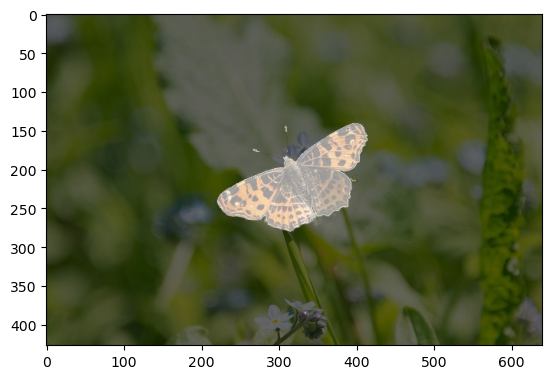

In [4]:
image, predictions = tc.inference(r"data/bf.png")

plt.imshow(image)
plt.imshow(predictions, cmap='Greys', alpha=0.6)
plt.show()

In [11]:
import torch
targets = torch.tensor(predictions.reshape((predictions.size, 1)))

from models import RealNVP
network = RealNVP(in_channels=2, mid_channels=32)
tc = TrainingCenter(network, None, snapshots_folder=r"C:\Users\mrsto\Desktop\.snapshots", model_name="real_nvp", resume_mode="best")

data = ImageDataset(r"data/bf.png", r"data/bf.png", r"data/bf.png", ignore_rgb=True, train=False)
with torch.no_grad():
    data.data = tc.model(torch.tensor(data.data))[0]
data.labels = targets

train_loader, test_loader = create_dataloaders(data)

Model restored from epoch 50. Loss: 7.449


In [12]:
net = Network(2, 1, convex=True)
optimizer = AdamW(net.parameters(), 0.001)

tc = TrainingCenter(net, optimizer, model_name="convex")

tc.train(50, train_loader, test_loader)

Starting training from epoch: 0


100%|██████████| 245952/245952 [00:59<00:00, 4161.02it/s, loss=0.144]


Epoch 1 | Time 70.1 | Train Loss 0.1443 | Test Loss 0.135 | Test Acc 0


 30%|███       | 74560/245952 [00:19<00:43, 3916.60it/s, loss=0.133]


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\mrsto\AppData\Local\Programs\Python\miniconda3\envs\TORCH+JUPYTER\lib\site-packages\IPython\core\interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\mrsto\AppData\Local\Temp\ipykernel_3708\4073431337.py", line 6, in <module>
    tc.train(50, train_loader, test_loader)
  File "g:\My Drive\Study\RAML\utils\training_utils.py", line 63, in train
    train_losses = self._train_epoch(train_loader)
  File "g:\My Drive\Study\RAML\utils\training_utils.py", line 88, in _train_epoch
    loss = self._train_step(inputs, targets)
  File "g:\My Drive\Study\RAML\utils\training_utils.py", line 100, in _train_step
    return self._train_convex(inputs, targets)
  File "g:\My Drive\Study\RAML\utils\training_utils.py", line 117, in _train_convex
    def _train_flow(self, inputs, loss_fn=RealNVPLoss()) -> float:
  File "c:\Users\mrsto\AppData\Local\Programs\Python\miniconda3\envs\TORCH+JUPYTER

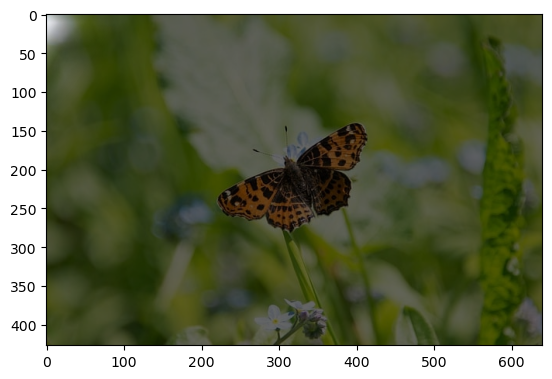

In [13]:
image, predictions = tc.inference(r"data/bf.png")

plt.imshow(image)
plt.imshow(predictions, cmap='Greys', alpha=0.6)
plt.show()